### Practical 4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("wine_data.csv",header=None,usecols=[0,1,2])
df.columns = ["class label","Alcohol","Malic Acid"]
df.head()

,class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

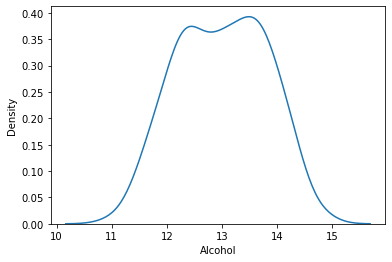

In [ ]:
sns.kdeplot(df["Alcohol"])

<AxesSubplot:xlabel='Malic Acid', ylabel='Density'>

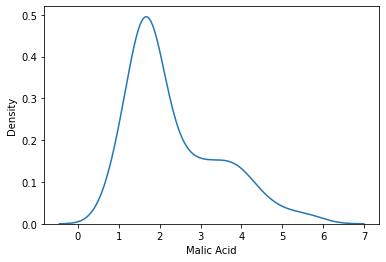

In [ ]:
sns.kdeplot(df["Malic Acid"])

<AxesSubplot:xlabel='Alcohol', ylabel='Malic Acid'>

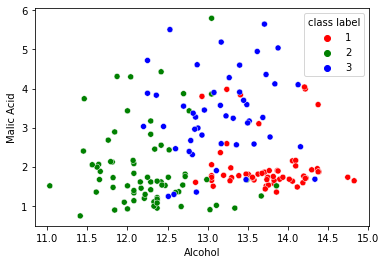

In [ ]:
colours = {1:"red",2:"green",3:"blue"}
sns.scatterplot(df["Alcohol"],df["Malic Acid"],hue = df["class label"],palette=colours)

In [ ]:
x = df.drop("class label",axis=1)
y = df["class label"]

In [ ]:
from sklearn.model_selection import train_test_split as t_test
x_train,x_test,y_train,y_test = t_test(x,y,test_size = 0.3, random_state = 0)

In [ ]:
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler #Normalization
scaler = MinMaxScaler()

In [ ]:
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_test_scaled

array([[ 0.72849462,  0.16386555],
       [ 0.47311828,  0.37394958],
       [ 0.36021505,  0.05042017],
       [ 0.68010753,  0.17647059],
       [ 0.54301075,  1.03151261],
       [ 0.14247312,  0.24369748],
       [ 0.81451613,  0.26470588],
       [ 0.35752688,  0.61764706],
       [ 0.32795699,  0.17647059],
       [ 0.28225806,  0.19747899],
       [ 0.62634409,  0.35084034],
       [ 0.76612903,  0.87184874],
       [ 0.85215054,  0.18277311],
       [ 0.36021505,  0.03781513],
       [ 0.68548387,  0.35504202],
       [ 0.26075269,  0.00630252],
       [ 0.73387097,  0.13445378],
       [ 0.84946237,  0.14705882],
       [ 0.4327957 ,  0.0987395 ],
       [ 0.75268817,  0.15966387],
       [ 0.55913978,  0.02521008],
       [ 0.54301075,  0.15966387],
       [ 0.59408602,  0.35714286],
       [ 0.39784946,  0.17647059],
       [ 0.34946237,  0.04411765],
       [ 0.40053763,  0.32352941],
       [ 0.37634409,  0.13445378],
       [ 0.30376344,  0.1512605 ],
       [ 0.19623656,

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [ ]:
x_train_scaled

,Alcohol,Malic Acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [ ]:
x_train_scaled.max()

Alcohol       1.0
Malic Acid    1.0
dtype: float64

In [ ]:
x_train_scaled.min()

Alcohol       0.0
Malic Acid    0.0
dtype: float64

In [ ]:
x_test_scaled.describe()

,Alcohol,Malic Acid
count,54.000000,54.000000
mean,0.540571,0.281007
std,0.226251,0.225487
min,0.102151,-0.031513
25%,0.358199,0.148109
50%,0.543011,0.184874
75%,0.723118,0.375525
max,1.021505,1.031513


Text(0.5, 1.0, 'After scaling')

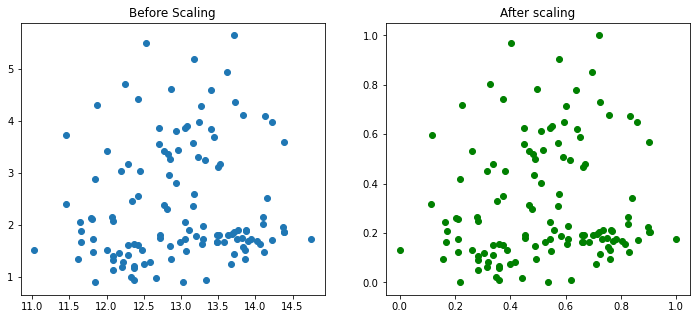

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train["Alcohol"],x_train["Malic Acid"])
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled["Alcohol"],x_train_scaled["Malic Acid"],color="green")
ax2.set_title("After scaling")

### Effects of outliers in normalization

In [ ]:
df.describe()

,class label,Alcohol,Malic Acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


In [ ]:
df2 = pd.DataFrame({
    "Alcohol" : [30,35,40],
    "Malic Acid" : [15,20,25],
    "class label" : [1,2,3]
})

In [ ]:
df3 = df.append(df2)
df3.describe()

,class label,Alcohol,Malic Acid
count,181.000000,181.000000,181.000000
mean,1.939227,13.365249,2.629116
std,0.775785,2.976302,2.572718
min,1.000000,11.030000,0.740000
25%,1.000000,12.370000,1.610000
50%,2.000000,13.050000,1.870000
75%,3.000000,13.710000,3.170000
max,3.000000,40.000000,25.000000


<AxesSubplot:xlabel='Alcohol', ylabel='Malic Acid'>

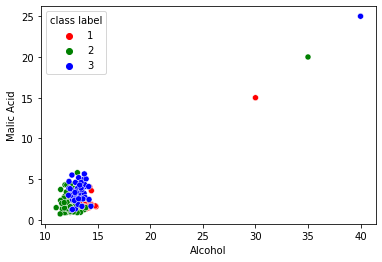

In [ ]:
colours = {1:"red",2:"green",3:"blue"}
sns.scatterplot(df3["Alcohol"],df3["Malic Acid"],hue = df3["class label"],palette=colours)

In [ ]:
x1 = df3.drop('class label',axis=1)
x1_train,x1_test,y1_train,y1_test = t_test(x1,df3['class label'], test_size=0.3)

In [ ]:
x1_train_scaled = pd.DataFrame(scaler.fit_transform(x1_train))
x1_test_scaled = pd.DataFrame(scaler.fit_transform(x1_test))

<AxesSubplot:xlabel='0', ylabel='1'>

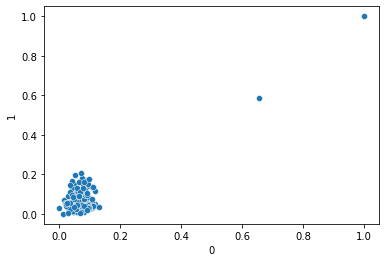

In [ ]:
sns.scatterplot(x1_train_scaled[0],x1_train_scaled[1],palette = 'colours')

In [ ]:
X_train_o, X_test_o ,y_train_o,y_test_o = t_test(df3.drop('class label',axis=1),df3['class label'],
                                                  test_size=0.3,
                                                  random_state=0)

In [ ]:
X_train_scaled_o = pd.DataFrame(scaler.fit_transform(X_train_o),columns=x_train.columns)
X_test_scaled_o = pd.DataFrame(scaler.fit_transform(X_test_o),columns=x_test.columns)

<AxesSubplot:xlabel='Alcohol', ylabel='Malic Acid'>

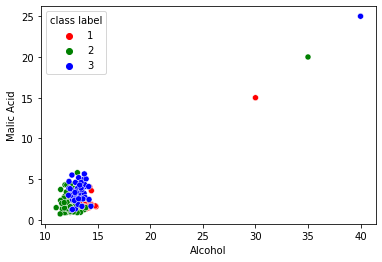

In [ ]:
color_dict = {1:'red',2:'green',3:'blue'}
sns.scatterplot(df3['Alcohol'],df3['Malic Acid'],hue=df3['class label'],palette=color_dict)

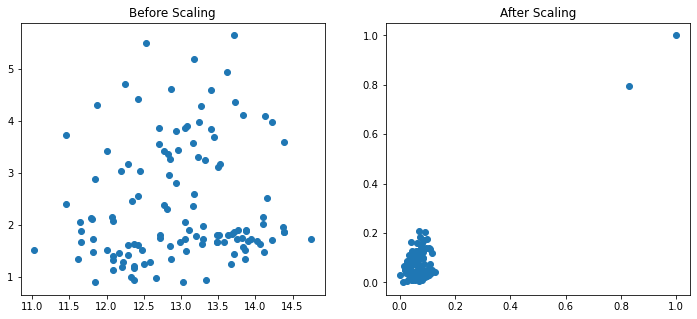

In [ ]:
from matplotlib import pyplot as plt
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Alcohol'],x_train['Malic Acid'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled_o['Alcohol'],X_train_scaled_o['Malic Acid'])
ax2.set_title('After Scaling')
plt.show()